In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)


In [ ]:
input_dir = r"D:\A\miniproject3\datasets\rawdata"
output_dir = r"D:\A\miniproject3\datasets"
os.makedirs(output_dir, exist_ok=True)


In [ ]:
final_df = pd.read_csv("D:/A/miniproject3/datasets/final_cleaned_data.csv")
final_df.head()


,Date,Centre_Name,Commodity_Name,Price,Month
0,2008-10-15,BENGALURU,Brinjal,14.0,2008-10
1,2008-10-16,BENGALURU,Brinjal,14.0,2008-10
2,2008-10-17,BENGALURU,Brinjal,14.0,2008-10
3,2008-10-20,BENGALURU,Brinjal,14.0,2008-10
4,2008-10-21,BENGALURU,Brinjal,14.0,2008-10


In [50]:
print("\nData Overview:")
print(final_df.info())



Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349397 entries, 0 to 349396
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            349397 non-null  object 
 1   Centre_Name     349397 non-null  object 
 2   Commodity_Name  349397 non-null  object 
 3   Price           349397 non-null  float64
 4   Month           349397 non-null  object 
dtypes: float64(1), object(4)
memory usage: 13.3+ MB
None


In [51]:
final_df = final_df.drop_duplicates()
print("\nDuplicates Removed. Final Shape:", final_df.shape)



Duplicates Removed. Final Shape: (349397, 5)


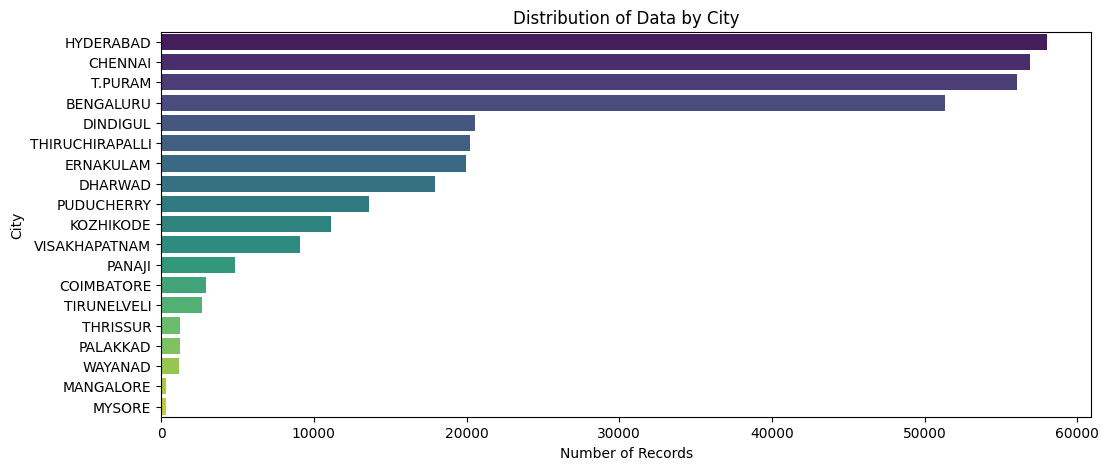

In [52]:
plt.figure(figsize=(12, 5))
sns.countplot(data=final_df, y="Centre_Name", order=final_df["Centre_Name"].value_counts().index, palette="viridis")
plt.xlabel("Number of Records")
plt.ylabel("City")
plt.title("Distribution of Data by City")
plt.show()


In [53]:
final_df["Date"] = pd.to_datetime(final_df["Date"], errors="coerce")
final_df["Month"] = final_df["Date"].dt.to_period("M")


In [54]:
print(final_df.dtypes)


Date              datetime64[ns]
Centre_Name               object
Commodity_Name            object
Price                    float64
Month                  period[M]
dtype: object


In [55]:
final_df["Month"] = final_df["Date"].dt.to_period("M")
monthly_prices = final_df.groupby("Month")["Price"].mean()
final_df.head()


,Date,Centre_Name,Commodity_Name,Price,Month
0,2008-10-15,BENGALURU,Brinjal,14.0,2008-10
1,2008-10-16,BENGALURU,Brinjal,14.0,2008-10
2,2008-10-17,BENGALURU,Brinjal,14.0,2008-10
3,2008-10-20,BENGALURU,Brinjal,14.0,2008-10
4,2008-10-21,BENGALURU,Brinjal,14.0,2008-10


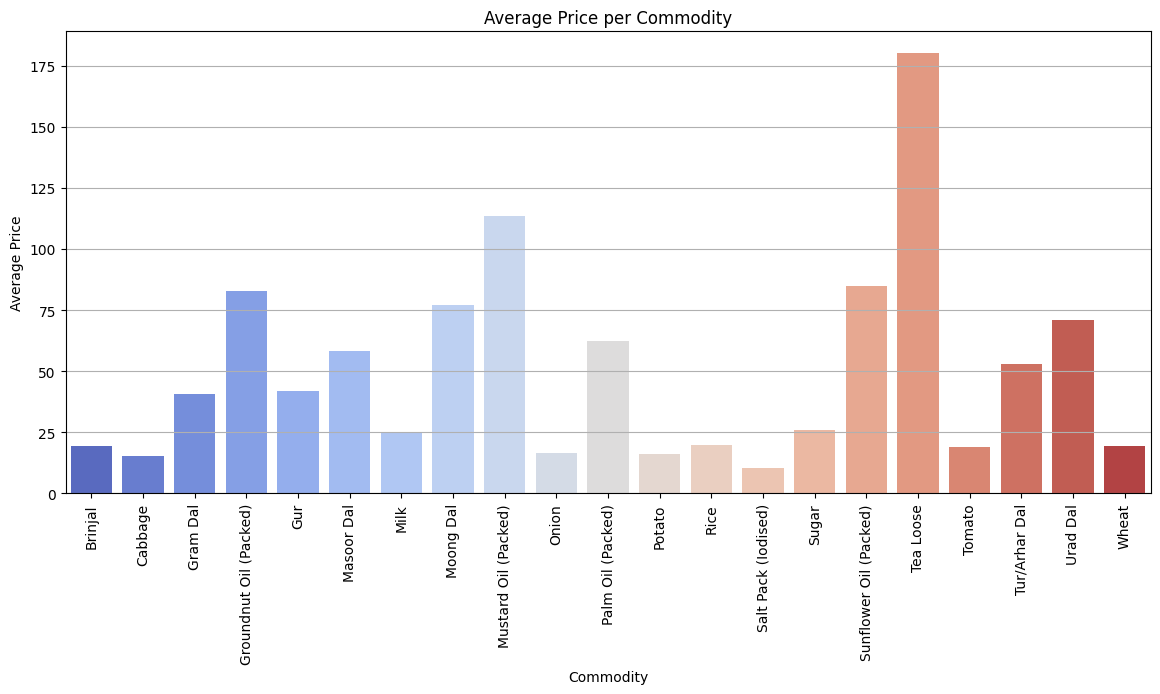

In [56]:
plt.figure(figsize=(14, 6))
sns.barplot(data=final_df, x="Commodity_Name", y="Price", errorbar=None, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Commodity")
plt.ylabel("Average Price")
plt.title("Average Price per Commodity")
plt.grid(axis="y")
plt.show()


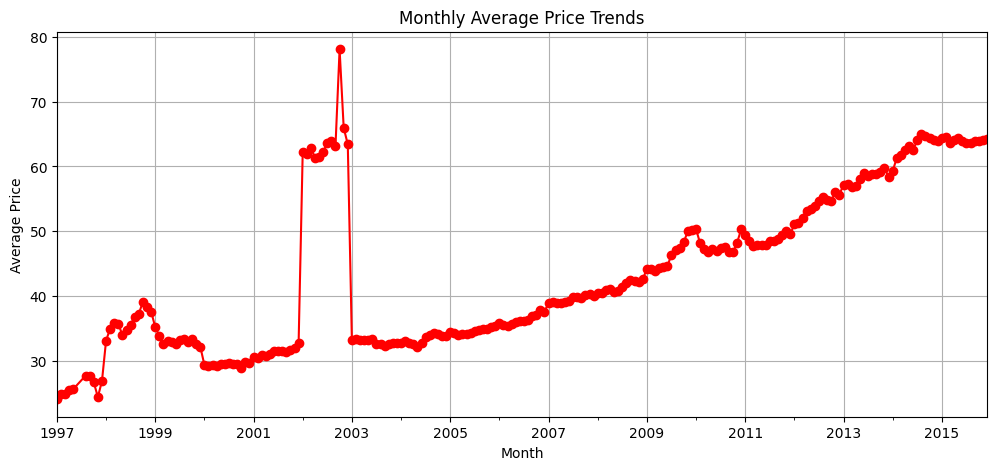

In [57]:

if monthly_prices.empty:
    print("Error: monthly_prices DataFrame is empty. Check your data processing pipeline.")
else:
    # Handle NaN values (fill with 0 or drop them)
    monthly_prices = monthly_prices.dropna()
    plt.figure(figsize=(12, 5))
monthly_prices.plot(marker="o", color="red")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Monthly Average Price Trends")
plt.grid()
plt.show()


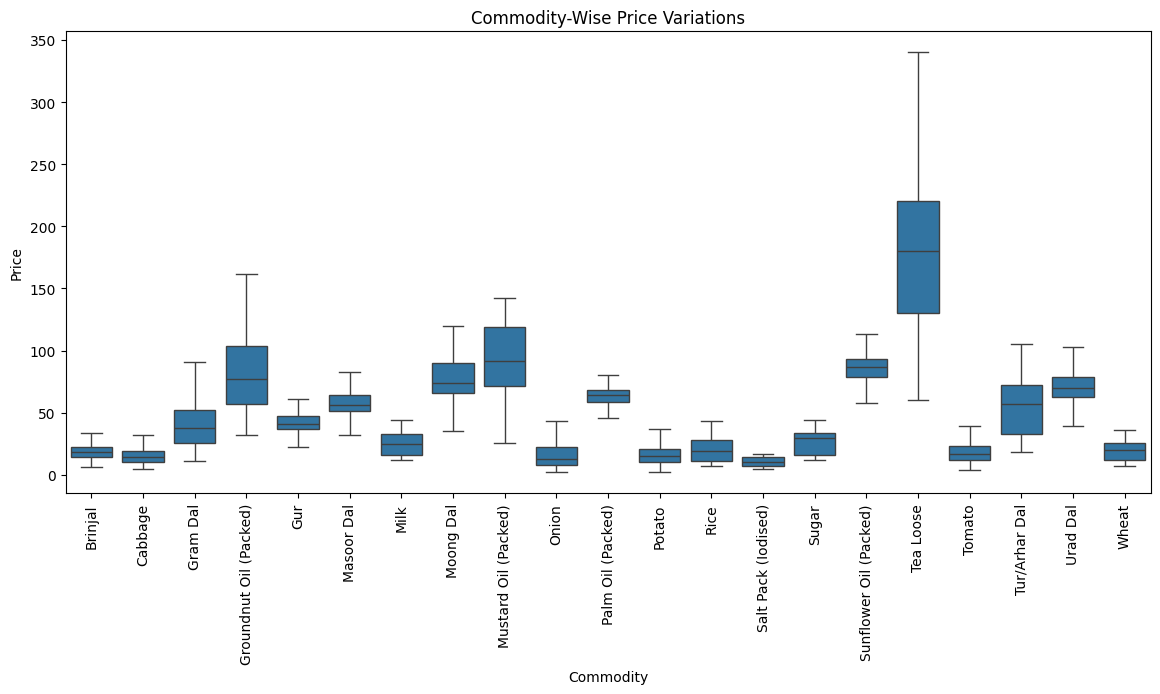

In [58]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=final_df, x="Commodity_Name", y="Price", showfliers=False)
plt.xticks(rotation=90)
plt.xlabel("Commodity")
plt.ylabel("Price")
plt.title("Commodity-Wise Price Variations")
plt.show()


In [ ]:
# final_df.to_csv(os.path.join(output_dir, "final_data.csv"), index=False, encoding="utf-8")
# print("\nFinal dataset saved as 'final_data.csv' in:", output_dir)



Final cleaned dataset saved as 'final_data.csv' in: D:\A\miniproject3\datasets\dummy


In [ ]:
print(final_df.describe())  
print(final_df.info())  


                                Date          Price
count                         349397  349397.000000
mean   2010-02-28 01:48:15.634479104      50.112962
min              1997-01-12 00:00:00       1.000000
25%              2007-05-30 00:00:00      16.000000
50%              2011-08-19 00:00:00      33.000000
75%              2013-09-20 00:00:00      68.000000
max              2015-12-03 00:00:00     999.990000
std                              NaN      54.755251
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349397 entries, 0 to 349396
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            349397 non-null  datetime64[ns]
 1   Centre_Name     349397 non-null  object        
 2   Commodity_Name  349397 non-null  object        
 3   Price           349397 non-null  float64       
 4   Month           349397 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), object(2), p

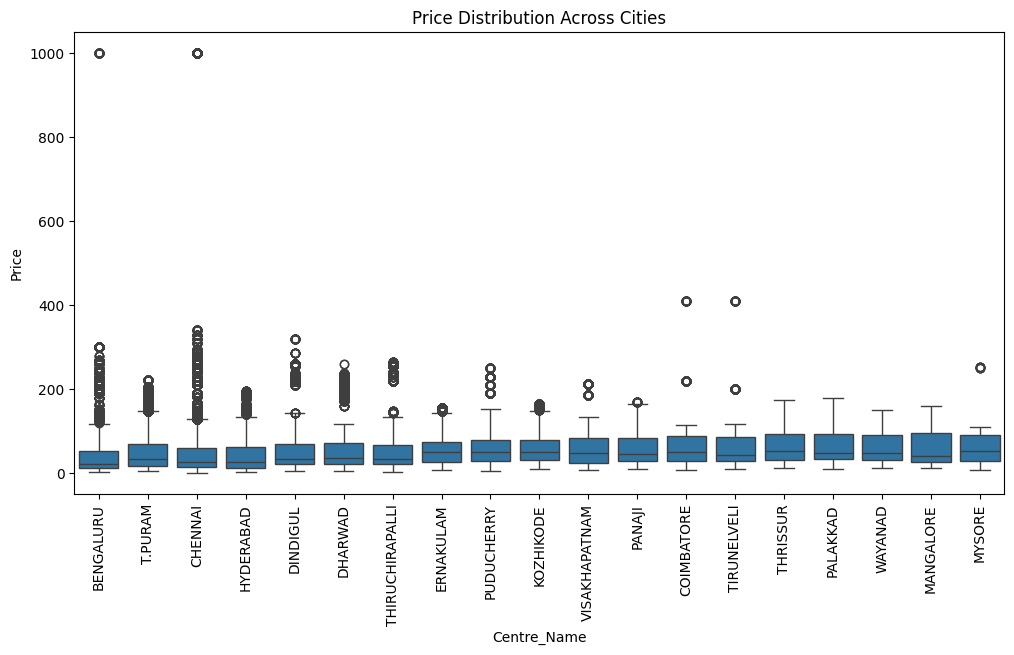

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df, x="Centre_Name", y="Price")
plt.xticks(rotation=90)
plt.title("Price Distribution Across Cities")
plt.show()
